In [1]:
import numpy as np
import openml
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import StratifiedKFold
# from proglearn.forest import UncertaintyForest

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans

from graspologic.embed import AdjacencySpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap, pairplot

from sklearn.utils.extmath import svd_flip
from sklearn.decomposition._pca import _infer_dimension
from scipy import linalg

import warnings
warnings.filterwarnings('ignore')
np.random.seed(8889)
%matplotlib inline

In [3]:
from sklearn.utils.extmath import svd_flip
from sklearn.decomposition._pca import _infer_dimension
from scipy import linalg

def minka(X):
    
    n_components = 'mle'
    n_samples = X.shape[0]
    U, S, Vt = linalg.svd(X, full_matrices=False)
    # flip eigenvectors' sign to enforce deterministic output
    U, Vt = svd_flip(U, Vt)

    components_ = Vt

    # Get variance explained by singular values
    explained_variance_ = (S ** 2) / (n_samples - 1)
    total_var = explained_variance_.sum()
    explained_variance_ratio_ = explained_variance_ / total_var
    singular_values_ = S.copy()  # Store the singular values.
    # Postprocess the number of components required
    if n_components == 'mle':
        #print(explained_variance_.shape[0])
        #print(n_samples)
        n_components = \
            _infer_dimension(explained_variance_, n_samples)
    return n_components

In [4]:
from graspologic.embed import select_dimension

In [6]:
benchmark_suite = openml.study.get_suite('OpenML-CC18') # obtain the benchmark suite

In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from ya_pca.linalg_utils import svd_wrapper
from ya_pca.viz import scree_plot

#Make a random array and then make it positive-definite
# true -- where we expect value to be 
# d1 -- ZG no hack elbow 1
# d2 -- ZG no hack elbow 2
# d3 -- minka 
# d4 -- ZG  hack elbow 1
# d5 -- ZG  hack elbow 2

def scree_2(A, d1, d2, d3, d4, d5, task_id):
    U, svals, V = svd_wrapper(A)
    plt.figure(figsize=(8, 8))
    colors = sns.color_palette()
    scree_plot(svals, color = colors[4])
    #set_xlim(bottom=0, top=max(svals))
    #plt.xlim(0)   
    axes = plt.gca()
    axes.set_xlim([.5, len(svals) + 1])
    axes.set_ylim([min(svals) - 2 ,max(svals) + 2])
    plt.title('Scree Plot of ' + str(task_id) + ', Dimensions: '+ str(A.shape[0]) + "," + str(A.shape[1]))
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue')
    ds = [int(np.median(d1)), int(np.median(d2)), int(np.median(d3)), int(np.median(d4)), int(np.median(d5))]
    locs = []
    added = set()
    for i in range(len(ds)):
        if ds[i] in added:  
            rec_ind = 0
            for j in range(0, i):
                if ds[j] == ds[i]:
                    rec_ind = j
            locs.append(locs[rec_ind] + .1)
        else:
            locs.append(ds[i])
        added.add(ds[i])
#     all_dims.append(ds)
        
    # plt.axvline(true, label='true dim:{}'.format(true), color=colors[3], linewidth = 8, alpha = .3, zorder =  0)
    plt.axvline(locs[0], label='ZG(1):{}'.format(ds[0]), color=colors[0], ls='--', zorder =  1)
    plt.axvline(locs[1], label='ZG(2):{}'.format(ds[1]), color=colors[0], ls=':', zorder =  1)
    plt.axvline(locs[2], label='minka:{}'.format(ds[2]), color=colors[1], ls='--', zorder =  1)
    plt.axvline(locs[3], label='ZG_hack(1):{}'.format(ds[3]), color= colors[2], ls='--', zorder =  1)
    plt.axvline(locs[4], label='ZG_hack(2):{}'.format(ds[4]), color=colors[2], ls=':', zorder =  1)
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left',)
    
    

In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from ya_pca.linalg_utils import svd_wrapper
from ya_pca.viz import scree_plot
import random

#Make a random array and then make it positive-definite
# true -- where we expect value to be 
# d1 -- ZG no hack elbow 1
# d2 -- ZG no hack elbow 2
# d3 -- minka 
# d4 -- ZG  hack elbow 1
# d5 -- ZG  hack elbow 2

def scree_basic(A, task_id):
    U, svals, V = svd_wrapper(A)
    plt.figure(figsize=(8, 8))
    colors = sns.color_palette()
    scree_plot(svals, color = colors[5])
    #set_xlim(bottom=0, top=max(svals))
    #plt.xlim(0)   
    axes = plt.gca()
    axes.set_xlim([.5, len(svals) + 1])
    axes.set_ylim([min(svals) - 2 ,max(svals) + 2])
    
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue')
    plt.title('Scree Plot of ' + str(task_id) + ', Dimensions: '+ str(A.shape[0]) + "," + str(A.shape[1]))

Produce Scree plots with the dimensions selection algorithms estimations

0 (3196, 36)


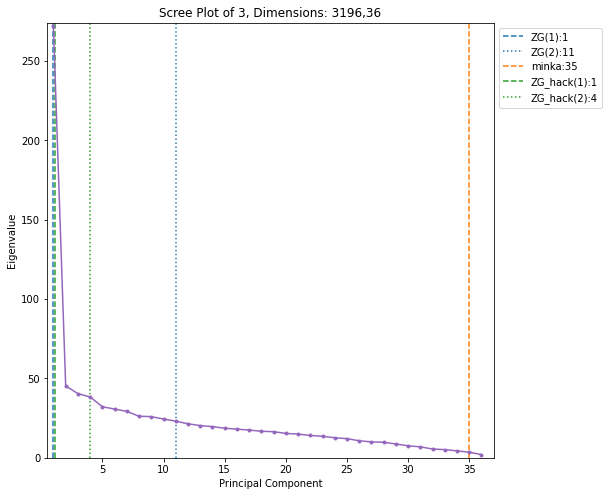

1 (20000, 16)


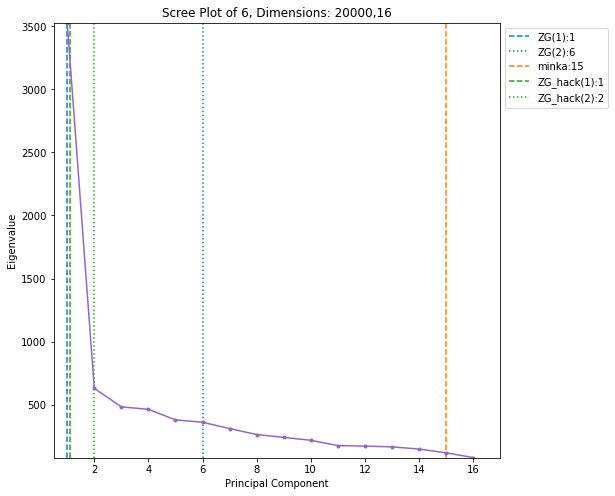

2 (625, 4)


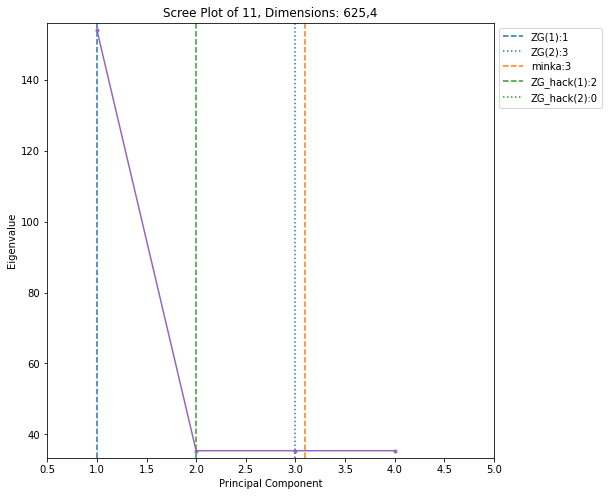

4 (2000, 76)


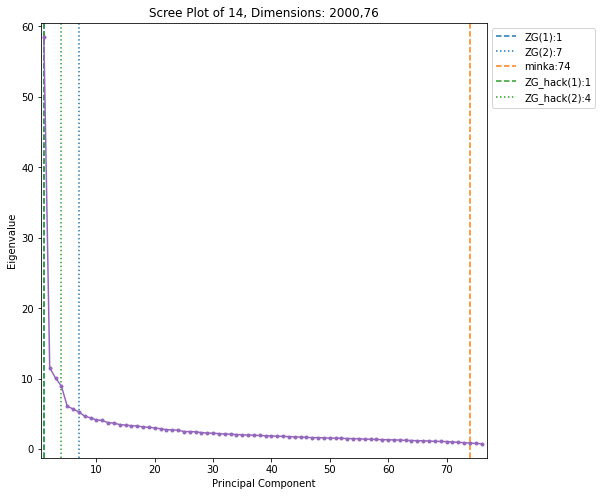

6 (2000, 64)


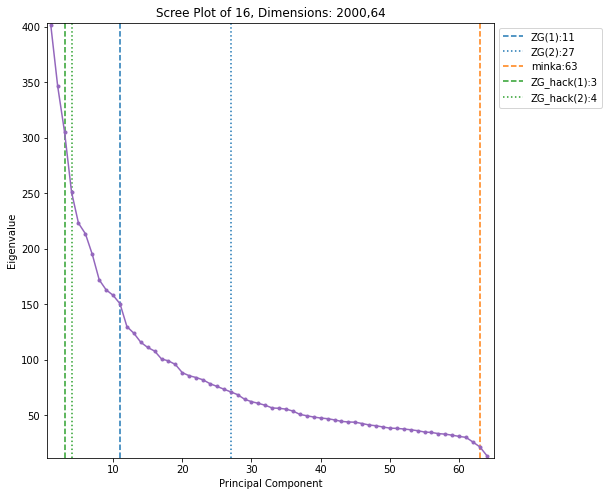

7 (2000, 6)


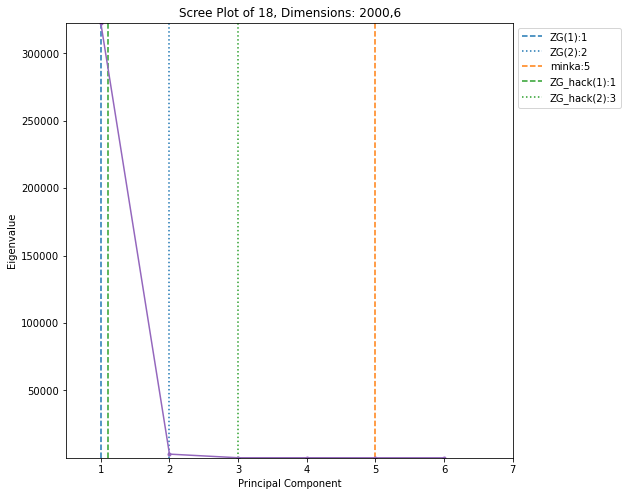

8 (2000, 47)


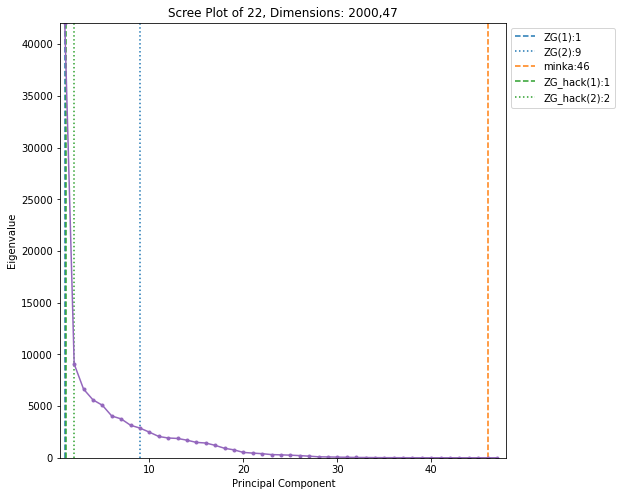

9 (1473, 9)


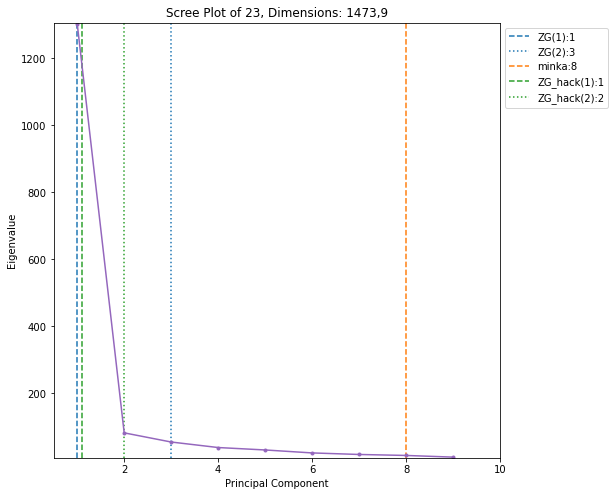

10 (5620, 64)


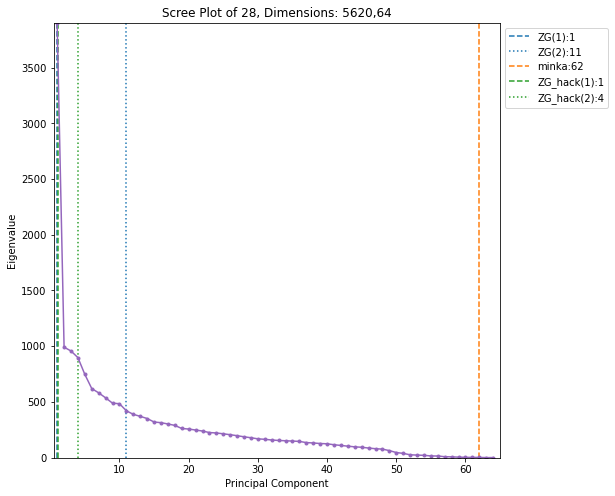

12 (1000, 20)


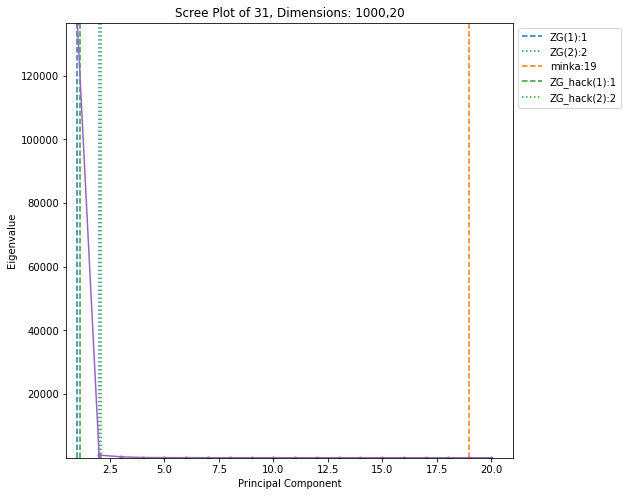

13 (10992, 16)


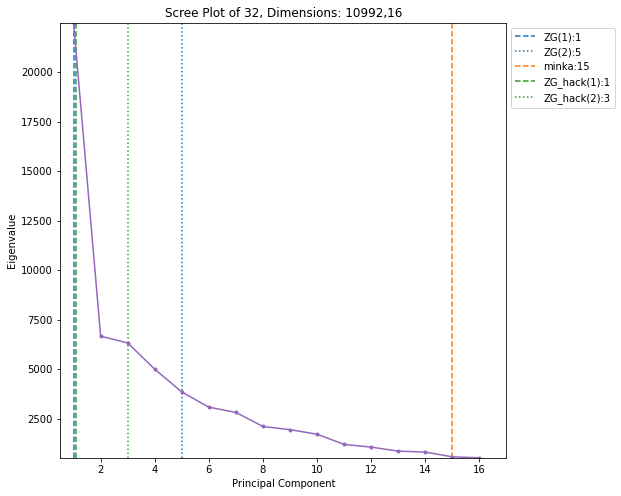

14 (768, 8)


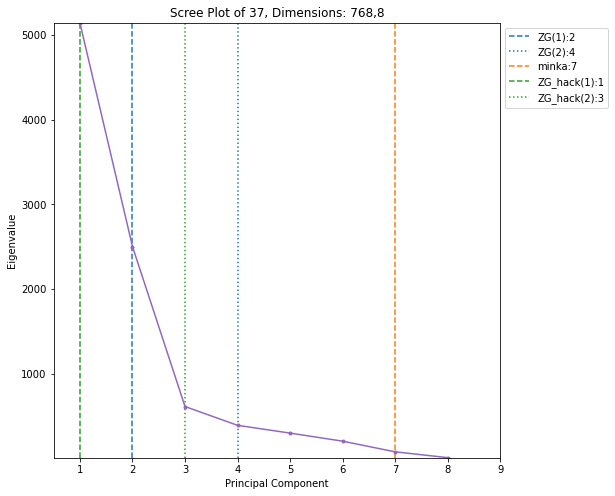

15 (4601, 57)


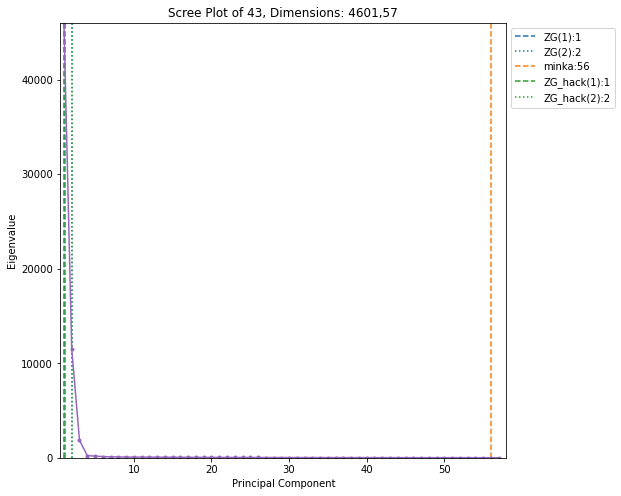

16 (3190, 60)


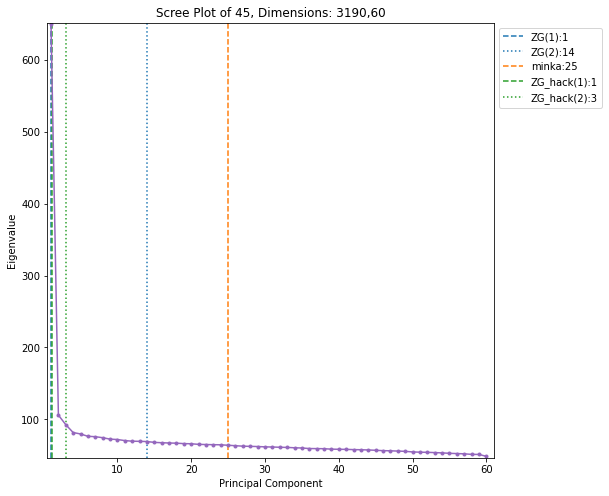

17 (958, 9)


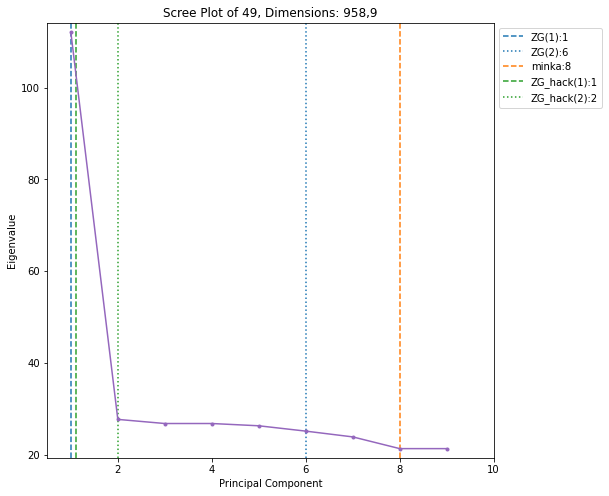

18 (846, 18)


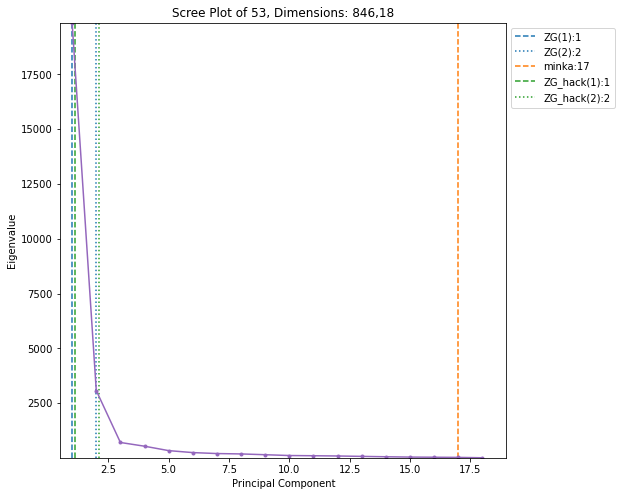

19 (45312, 8)


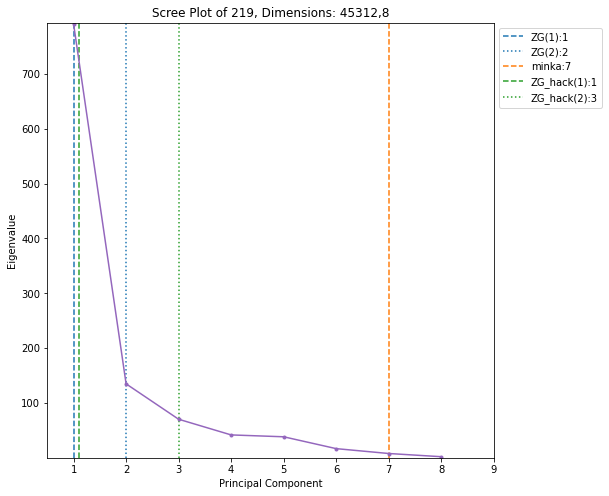

20 (6430, 36)


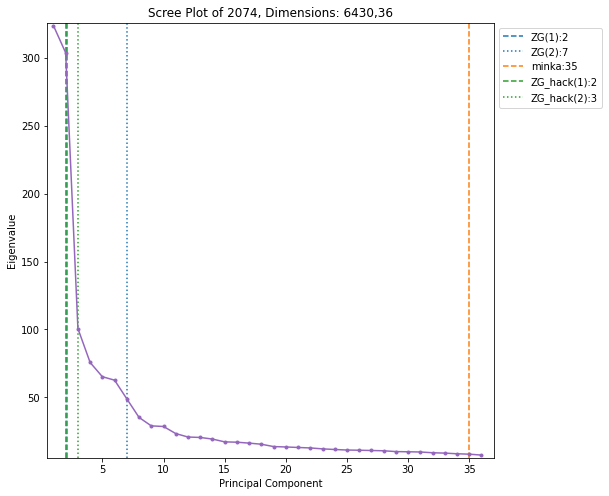

23 (990, 12)


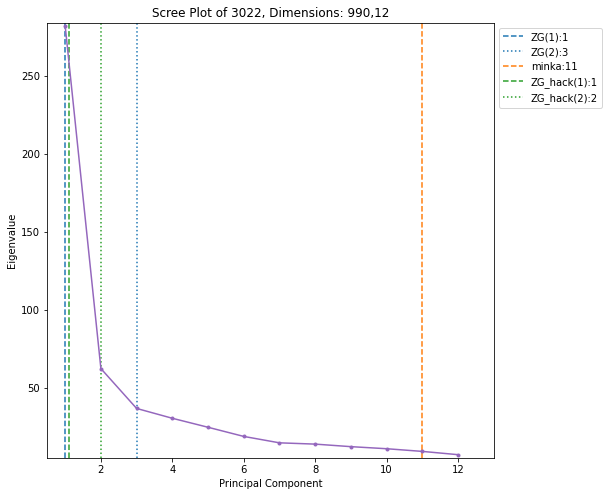

25 (841, 70)


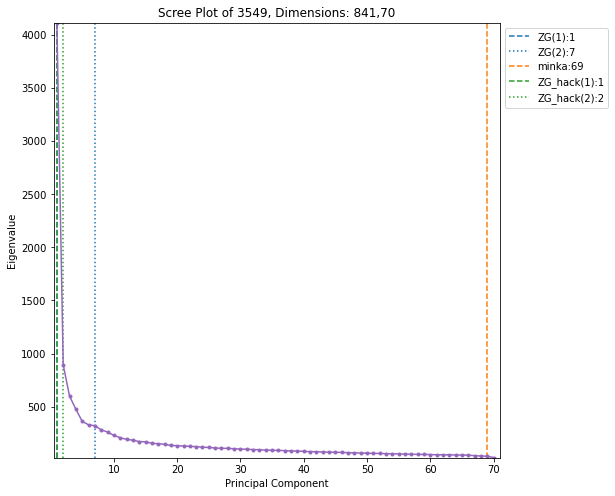

26 (797, 4)


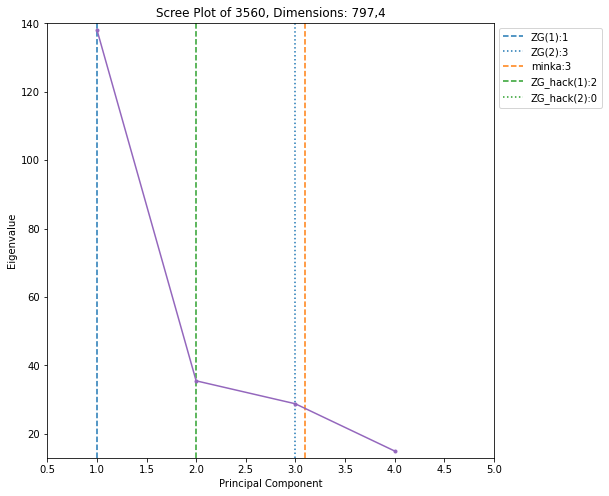

28 (1458, 37)
minka
29 (1563, 37)
minka
31 (522, 21)


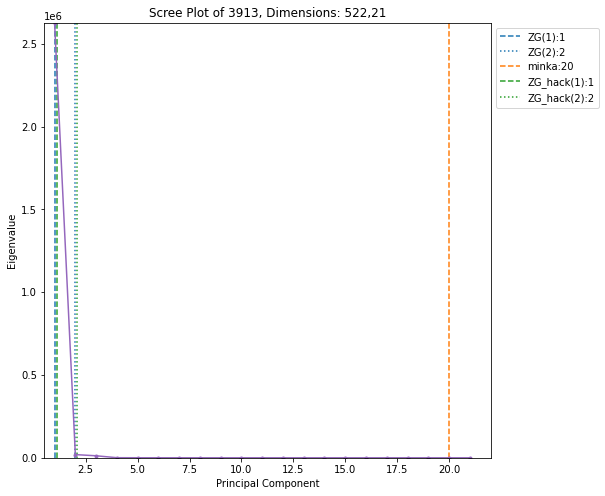

32 (2109, 21)


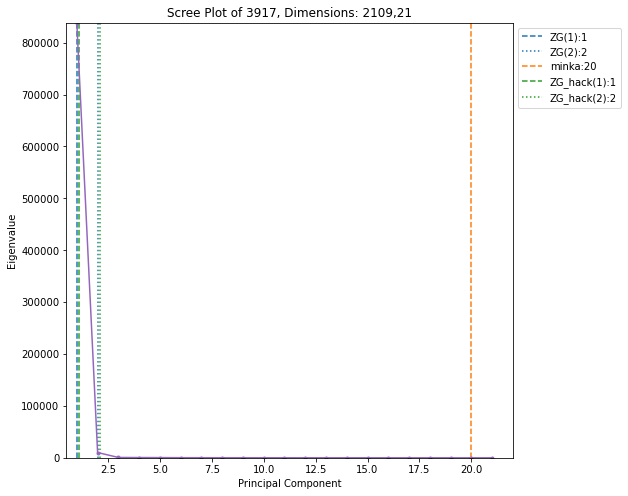

33 (1109, 21)


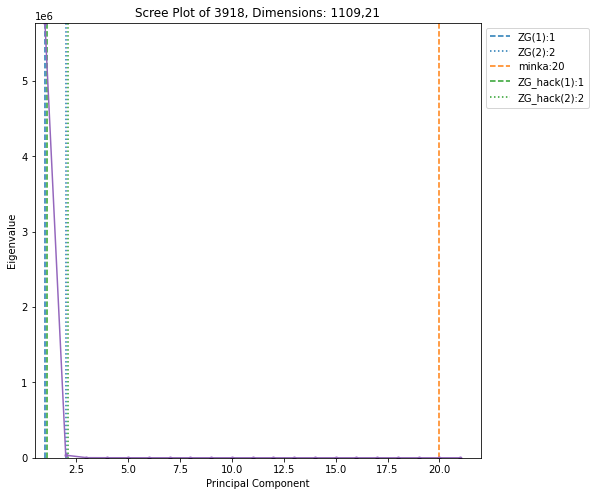

36 (569, 30)


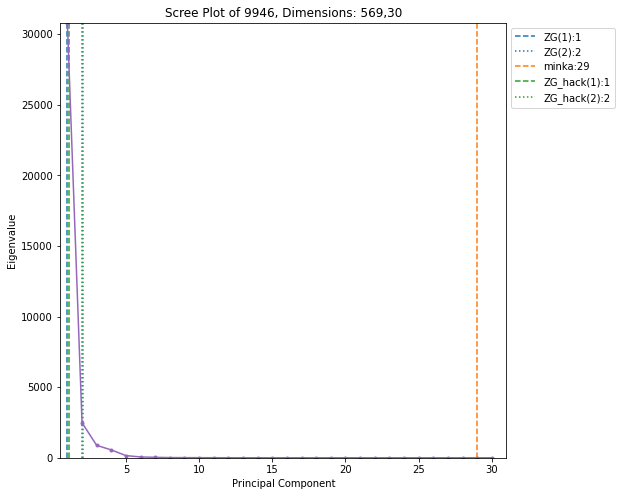

37 (5404, 5)


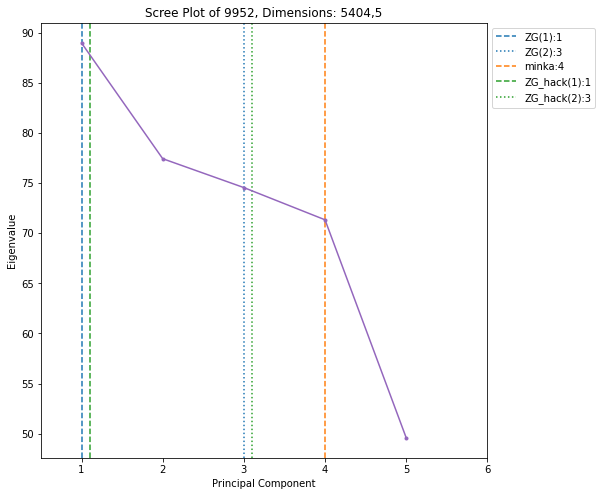

38 (1055, 41)


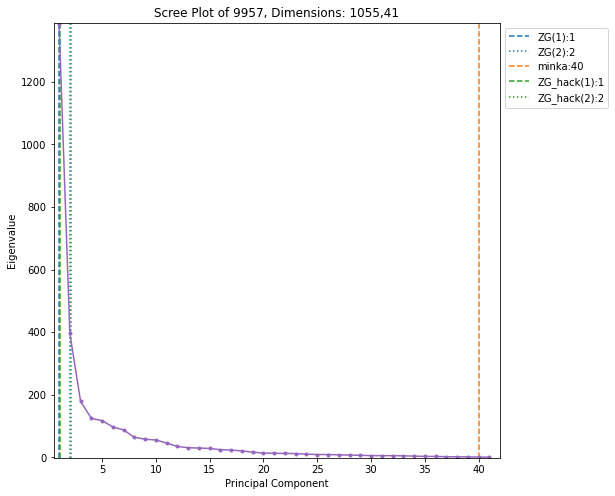

39 (5456, 24)


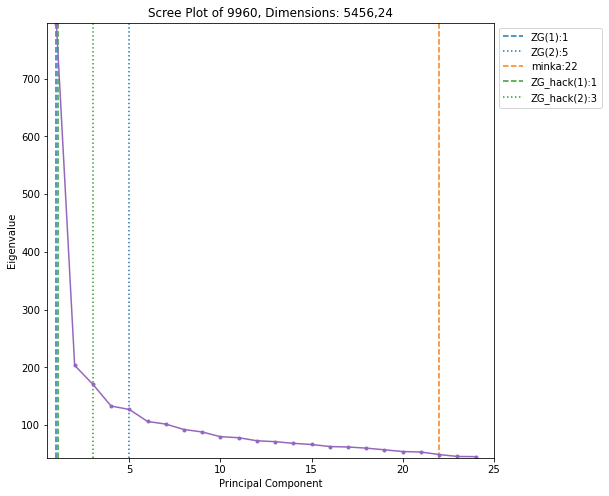

41 (583, 10)


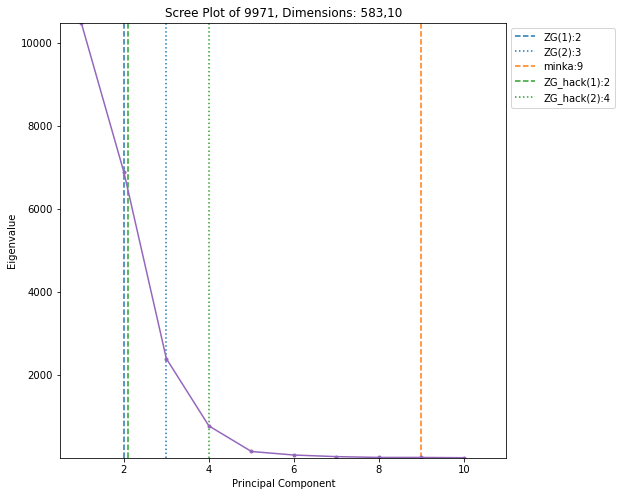

43 (34465, 118)
minka
44 (2534, 72)


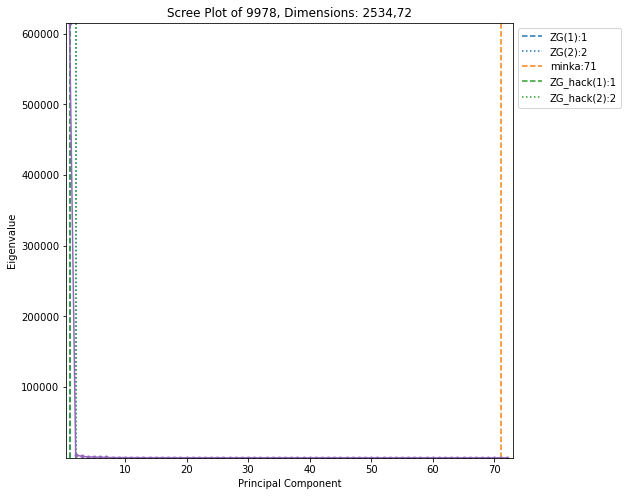

46 (6118, 51)


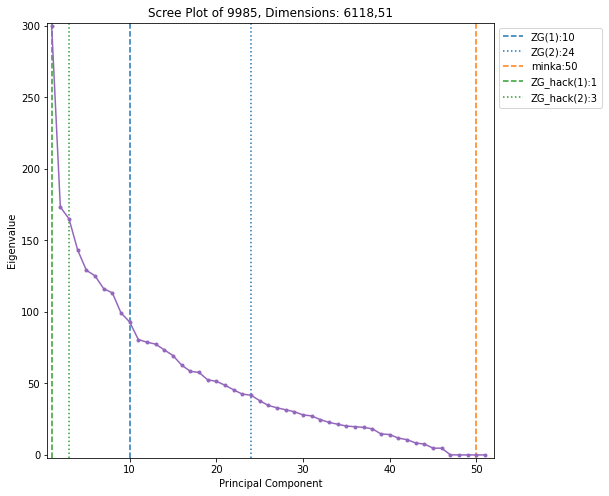

47 (1372, 4)


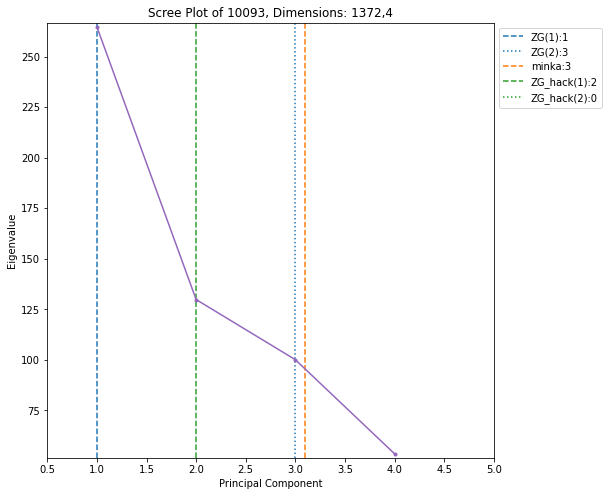

48 (748, 4)


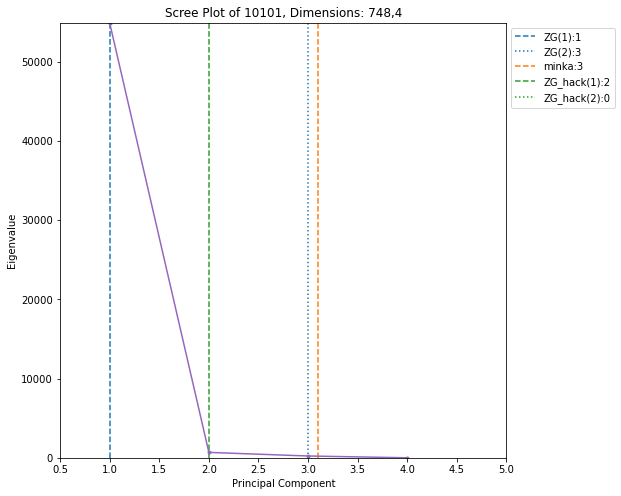

49 (11055, 30)


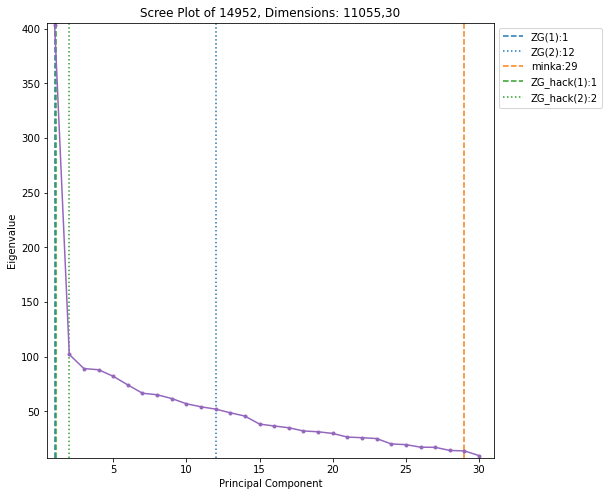

51 (45211, 16)


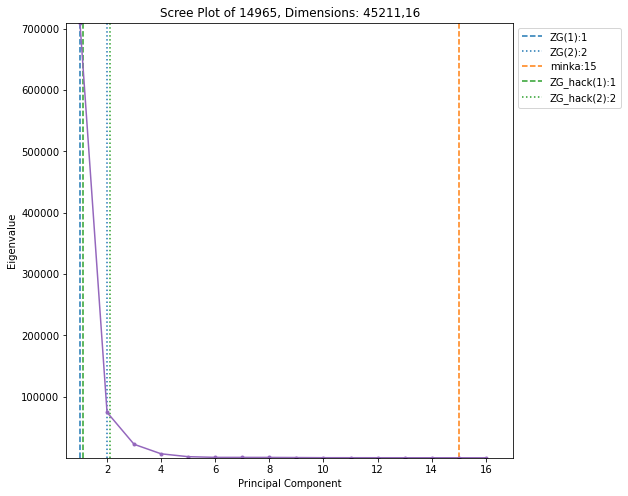

52 (9873, 32)


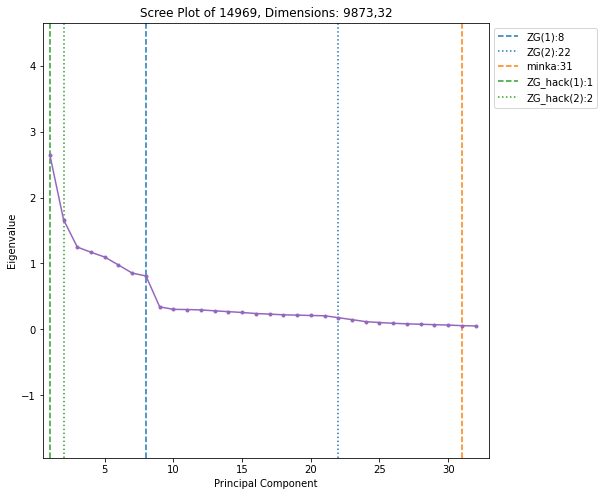

55 (5500, 40)


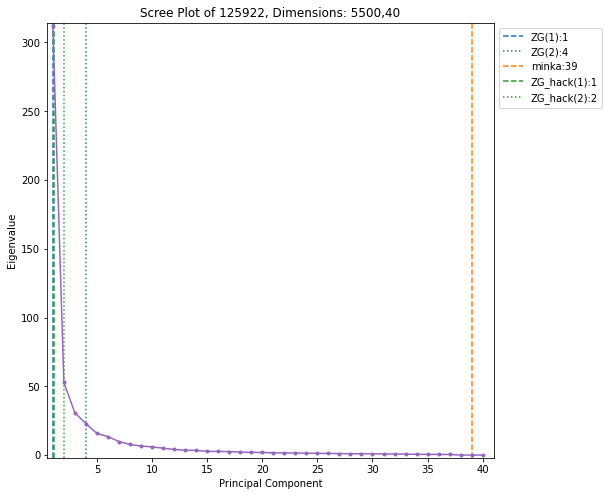

56 (67557, 42)


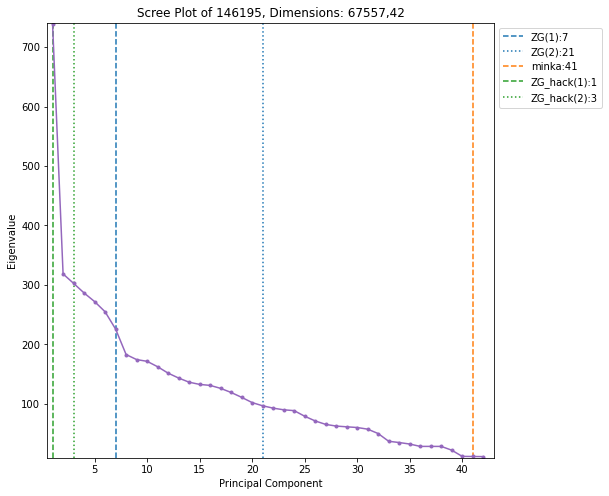

58 (1941, 27)
minka
59 (540, 18)


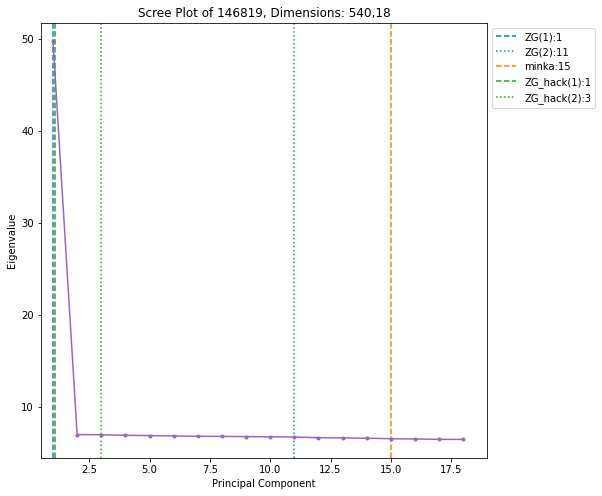

60 (4839, 5)


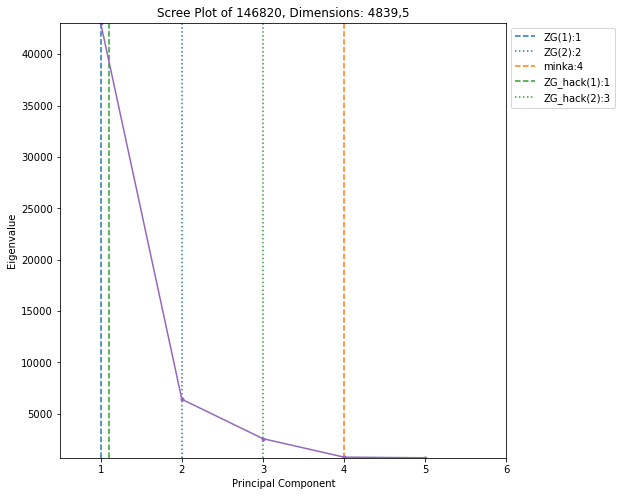

61 (1728, 6)


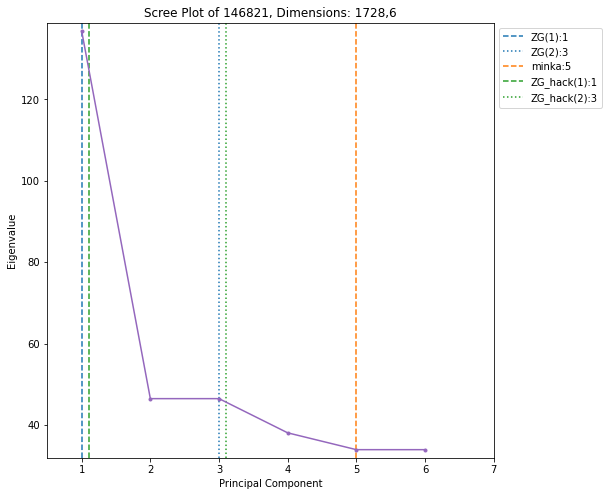

62 (2310, 16)


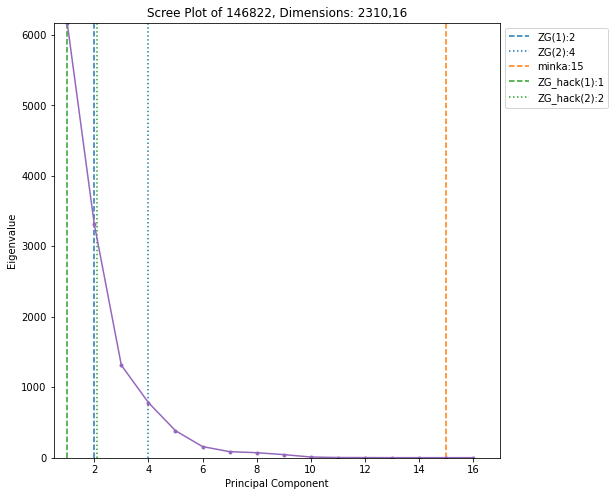

65 (44819, 6)


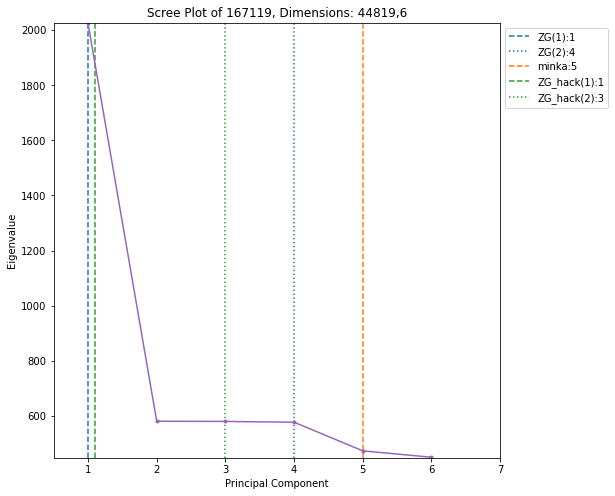

66 (96320, 21)


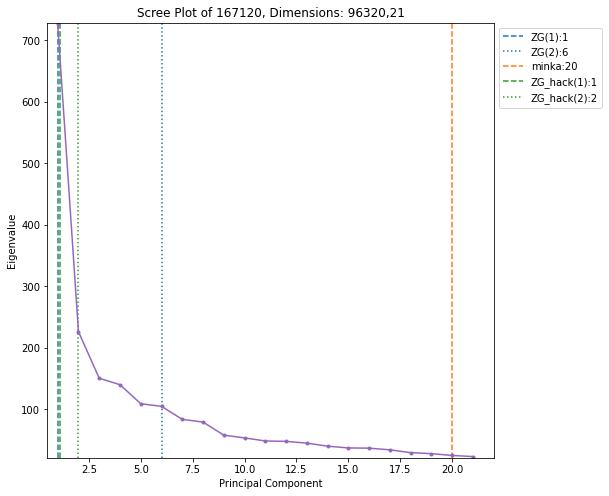

70 (3186, 180)


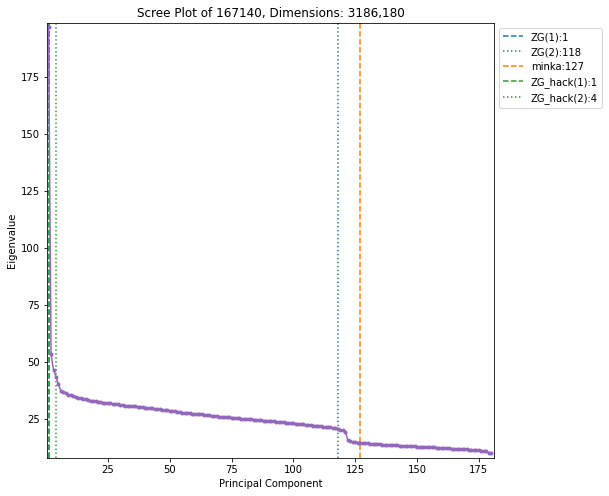

71 (5000, 20)


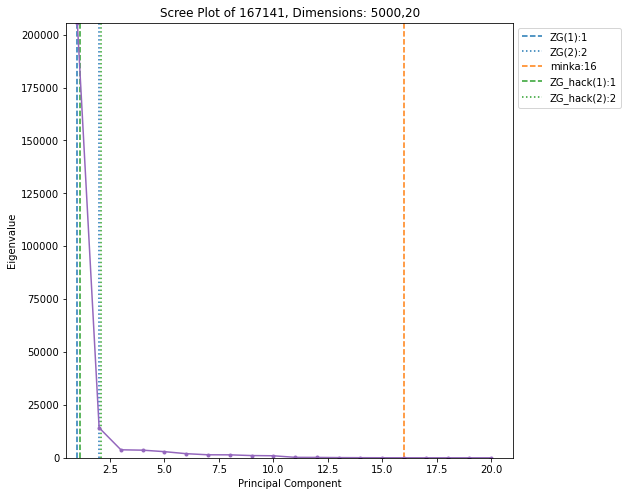

In [13]:
from matplotlib import pyplot as plt
import os
all_sims_dims = []
all_dims= []
all_data = []
all_ys = []
all_sims_colors = []
all_trues = []
dims_minka_all = []
dims_ZG_1_all = []
dims_ZG_2_all = []
dims_ZG_h_1_all = []
dims_ZG_h_2_all = []


for i, task_id in enumerate(benchmark_suite.tasks):  # iterate over all tasks
    task = openml.tasks.get_task(task_id)  # download the OpenML task
    A, y = task.get_X_and_y()  # get the data
    if np.isnan(np.sum(A)) or A.shape[1] > 200:
        continue
    print(i, A.shape)    
    dims_minka = []
    dims_ZG_1 = []
    dims_ZG_2 = []
    dims_ZG_h_1 = []
    dims_ZG_h_2 = []
    error = False
    for j in range(1):
        try:
            dims_minka.append(minka(A))
        except:
            print("minka")
            dims_minka.append(-1)
            error = True
        
        try: 
            d = select_dimension(A, n_components = A.shape[1] - 1)
            dims_ZG_1.append(d[0][0])
            # due to the function not always returning two element list we only append the first 
            if len(d[0]) > 1:
                dims_ZG_2.append(d[0][1])
            else:
                dims_ZG_2.append(0)
        except:
            print("full ZG")
            dims_ZG_1.append(-1)
            dims_ZG_2.append(-1)
            error = True
        
        
        try: 
            d_h = select_dimension(A)
            # due to the function not always returning two element list we only append the first
            dims_ZG_h_1.append(d_h[0][0])
            if len(d_h[0]) > 1:
                dims_ZG_h_2.append(d_h[0][1])
            else:
                dims_ZG_h_2.append(0)  
        except:
            print("hack ZG")
            dims_ZG_h_1.append(-1)
            dims_ZG_h_2.append(-1) 
            error = True
    if not error: 
        dims_ZG_1 = np.asarray(dims_ZG_1)
        dims_ZG_1_all.append(dims_ZG_1)

        dims_minka = np.asarray(dims_minka)
        dims_minka_all.append(dims_minka)

        dims_ZG_2 = np.asarray(dims_ZG_2)
        dims_ZG_2_all.append(dims_ZG_2)

        dims_ZG_h_1 = np.asarray(dims_ZG_h_1)
        dims_ZG_h_1_all.append(dims_ZG_h_1)

        dims_ZG_h_2 = np.asarray(dims_ZG_h_2)
        dims_ZG_h_2_all.append(dims_ZG_h_2)

        dims_ = [int(np.median(dims_ZG_1)), int(np.median(dims_ZG_2)), int(np.median(dims_minka)), int(np.median(dims_ZG_h_1)), int(np.median(dims_ZG_h_2))]
        all_dims.append(dims_)
        all_data.append(A)
        all_ys.append(y)
        scree_2(A,dims_ZG_1,dims_ZG_2 , dims_minka, dims_ZG_h_1, dims_ZG_h_2, task_id)
        direc = r'D:\Hopkins\Hopkins_senior\Neurodata\ndd_prac\ndd_stuff\sprint2\small_dim_select'
        full_dir = os.path.join(direc, 'fig' + str(i) + '.png')
        plt.savefig(full_dir)
        plt.show()



0 (3196, 36)


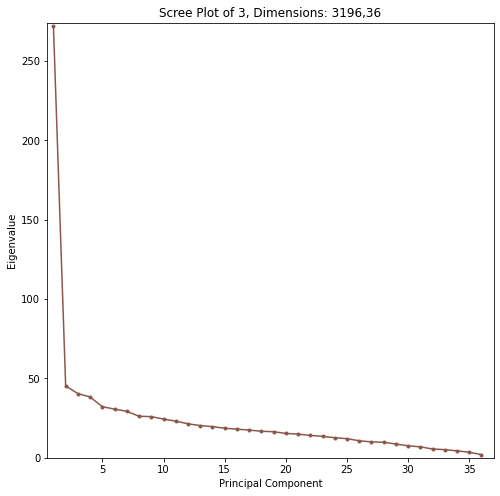

1 (20000, 16)


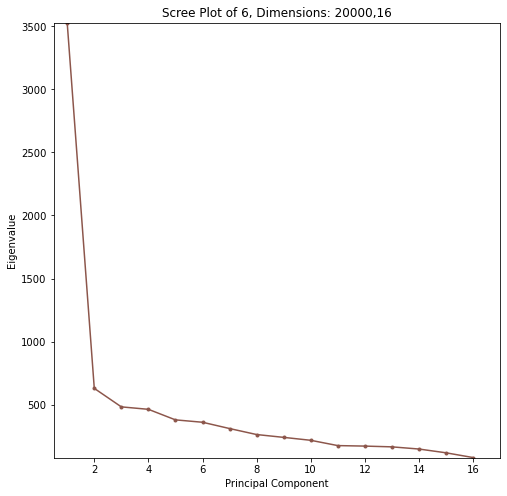

2 (625, 4)


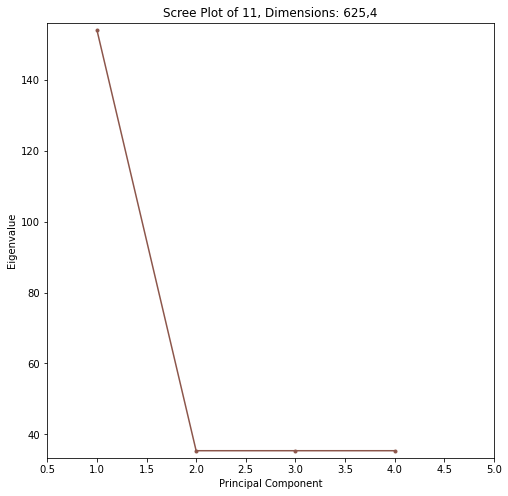

4 (2000, 76)


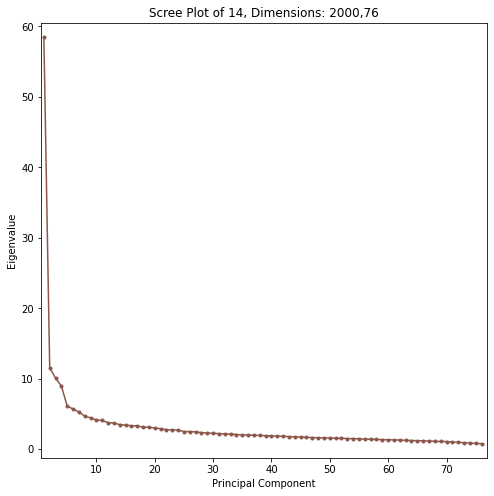

6 (2000, 64)


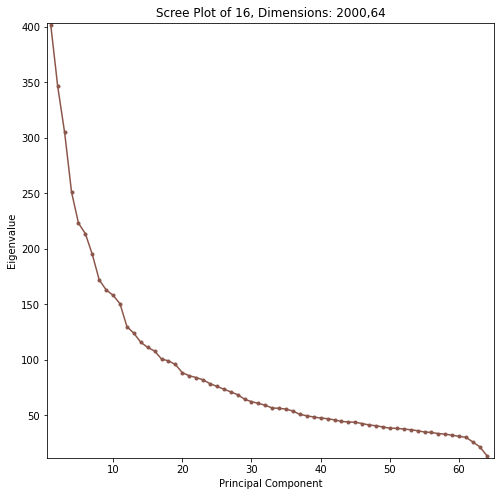

7 (2000, 6)


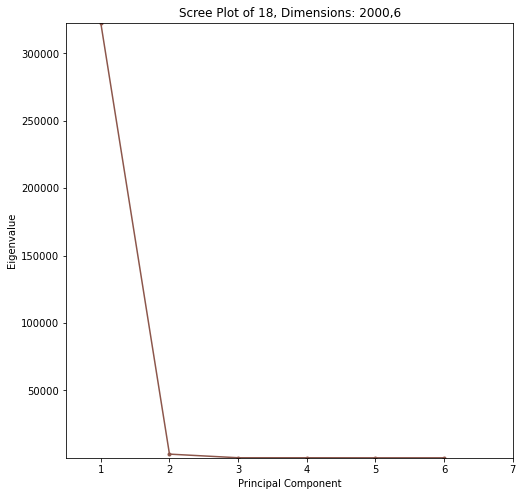

8 (2000, 47)


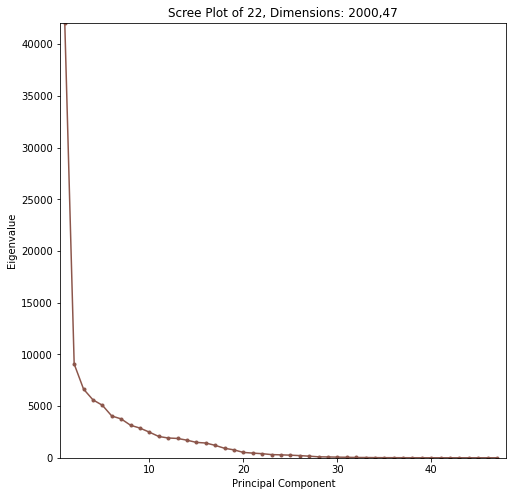

9 (1473, 9)


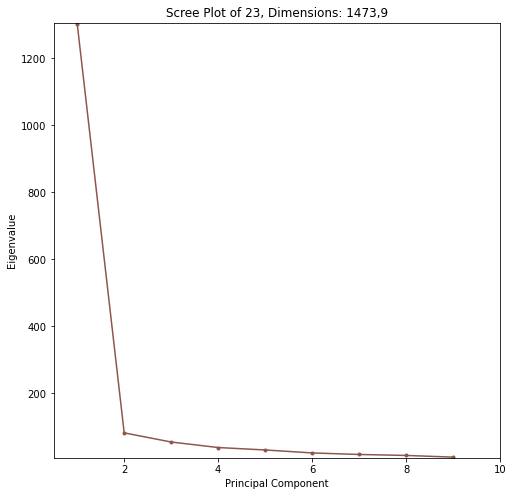

10 (5620, 64)


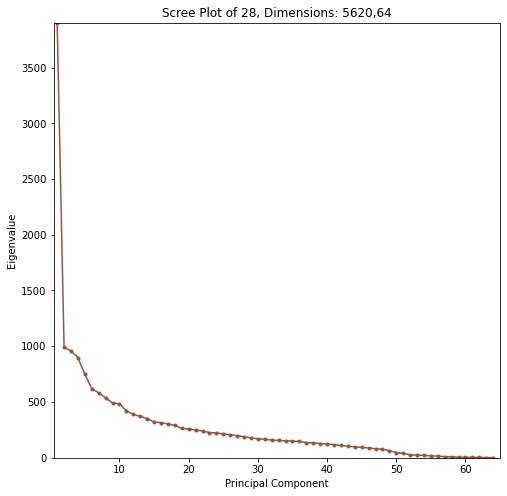

12 (1000, 20)


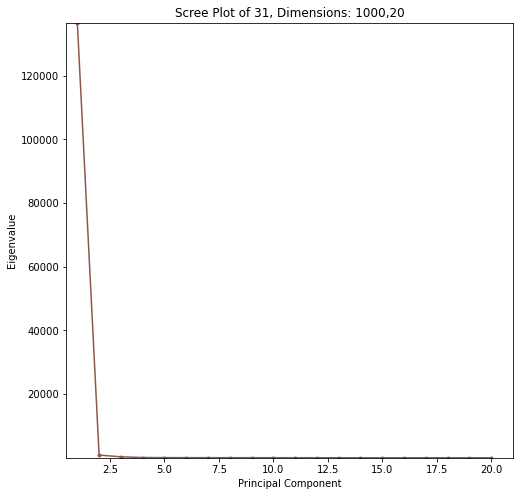

13 (10992, 16)


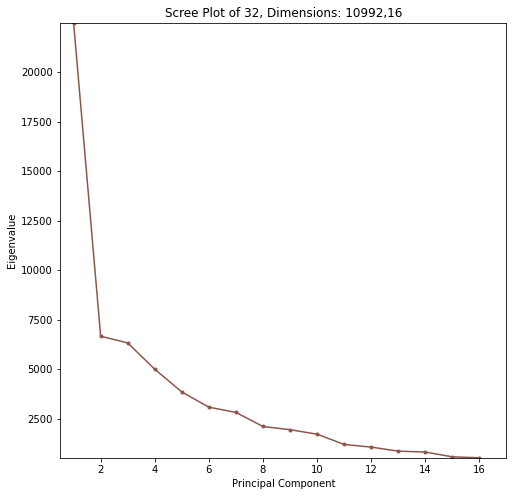

14 (768, 8)


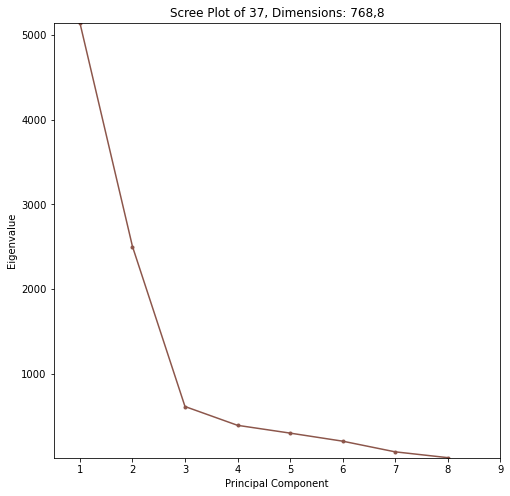

15 (4601, 57)


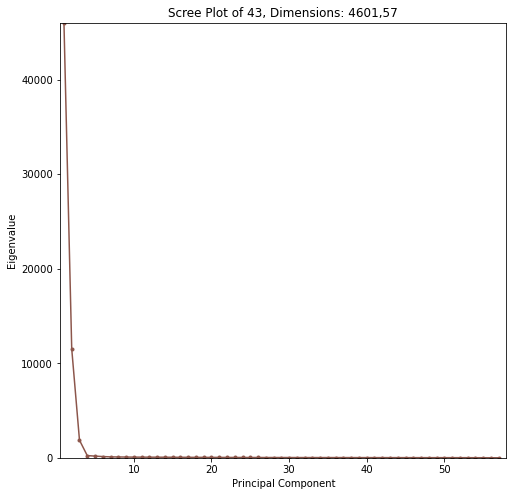

16 (3190, 60)


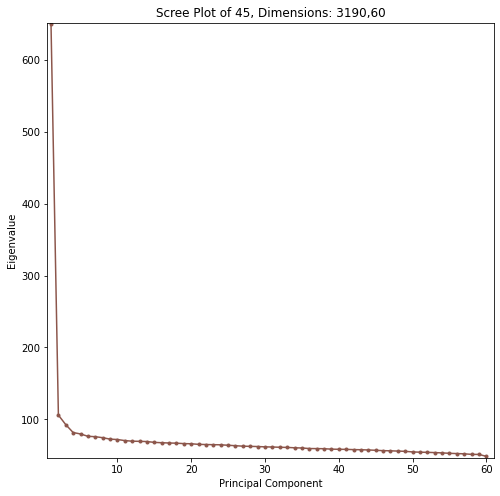

17 (958, 9)


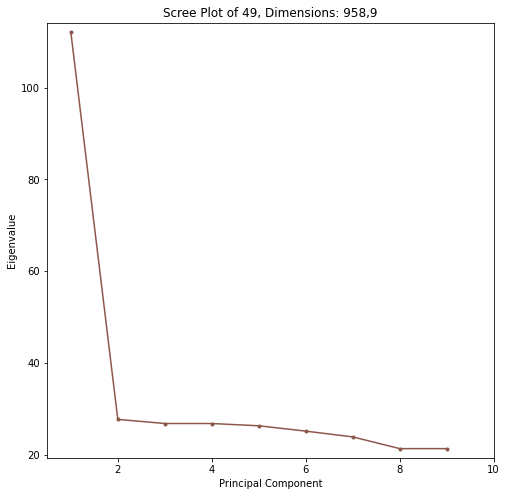

18 (846, 18)


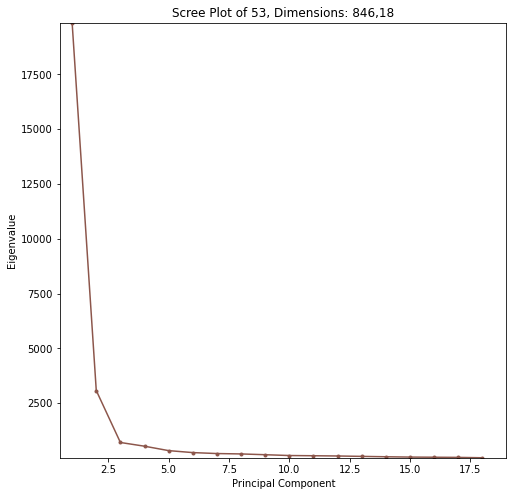

19 (45312, 8)


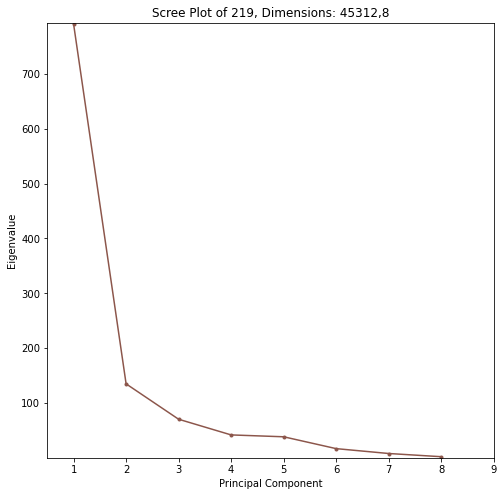

20 (6430, 36)


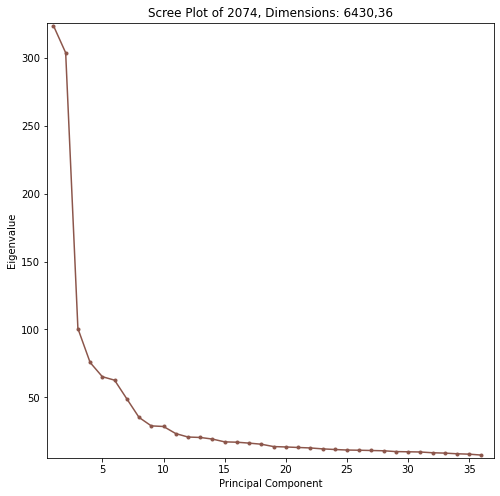

23 (990, 12)


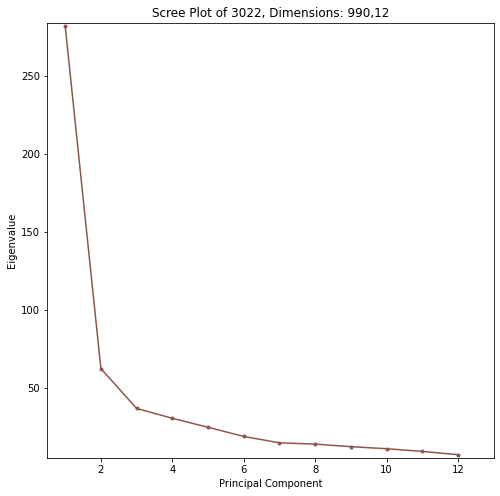

25 (841, 70)


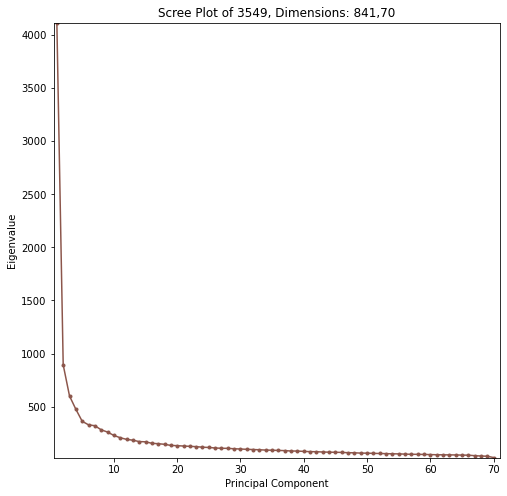

26 (797, 4)


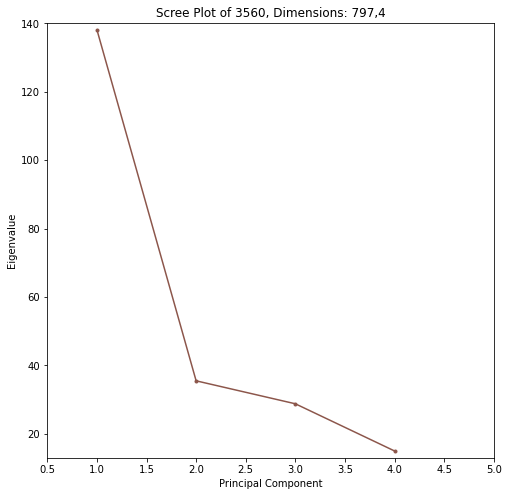

28 (1458, 37)
minka
29 (1563, 37)
minka
31 (522, 21)


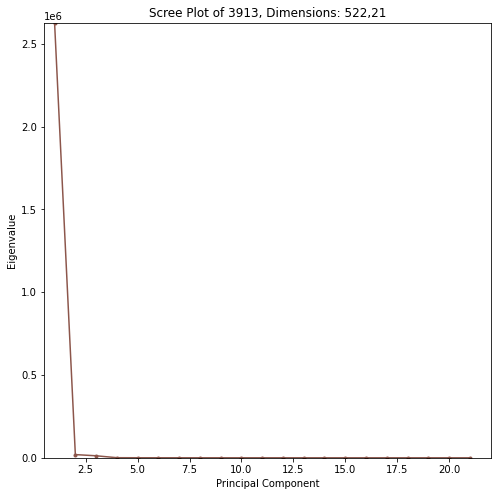

32 (2109, 21)


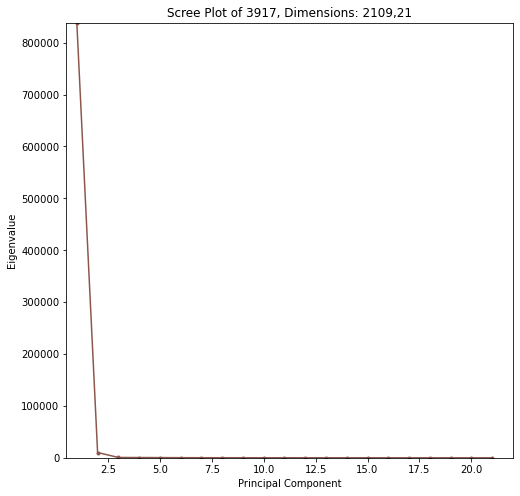

33 (1109, 21)


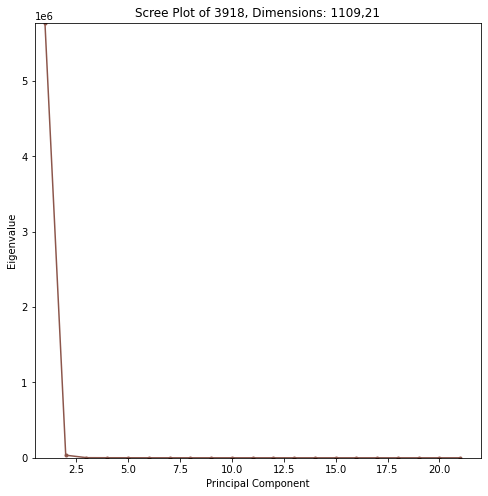

36 (569, 30)


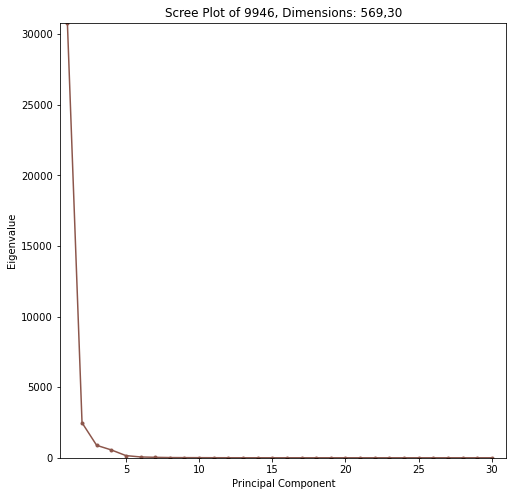

37 (5404, 5)


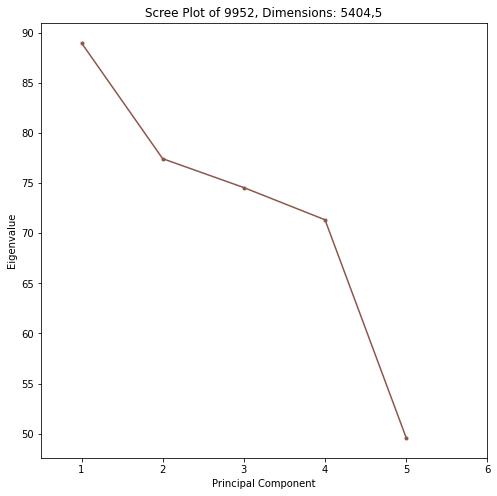

38 (1055, 41)


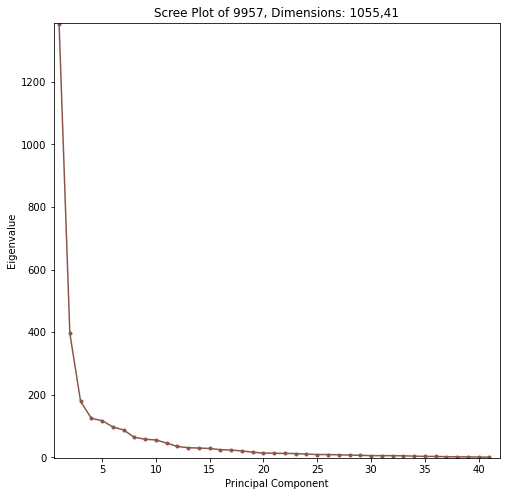

39 (5456, 24)


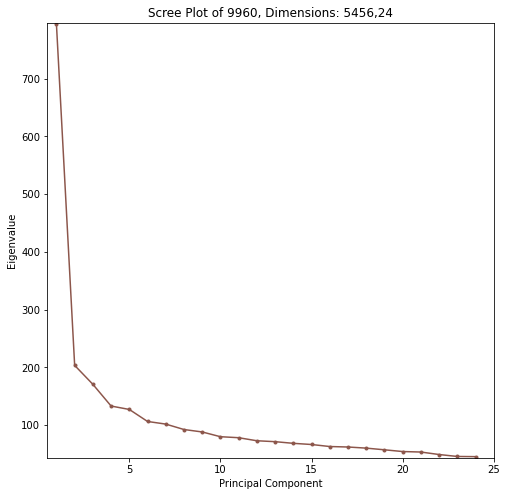

41 (583, 10)


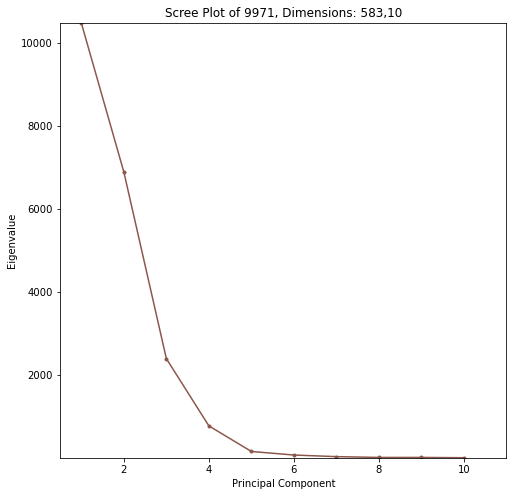

43 (34465, 118)
minka
44 (2534, 72)


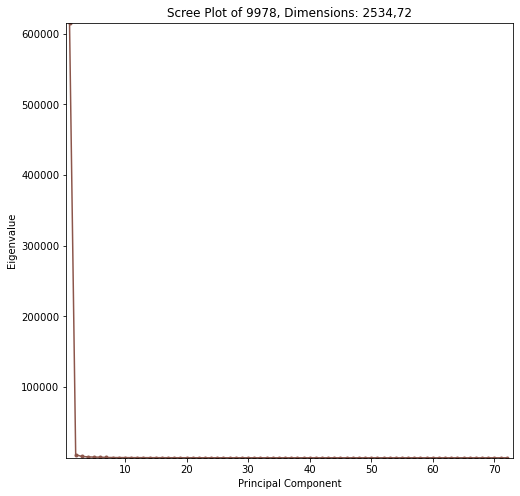

46 (6118, 51)


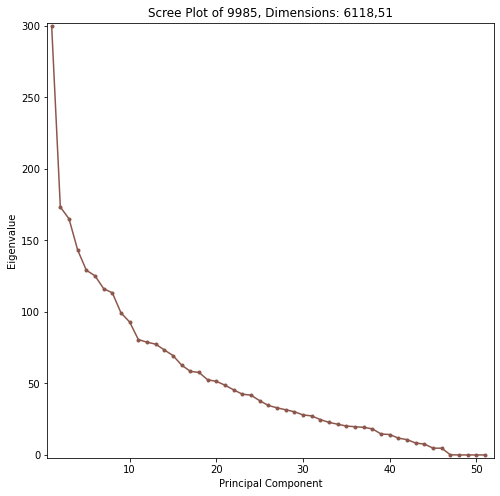

47 (1372, 4)


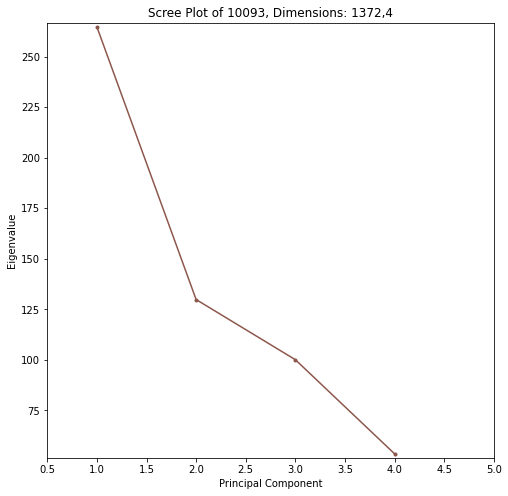

48 (748, 4)


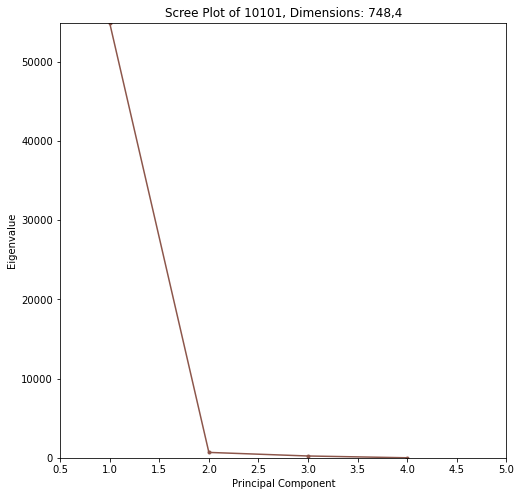

49 (11055, 30)


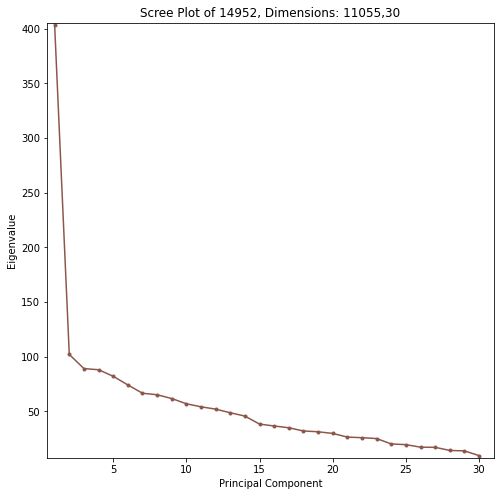

51 (45211, 16)


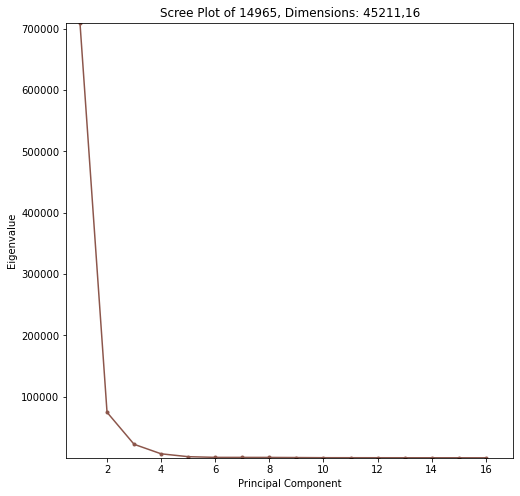

52 (9873, 32)


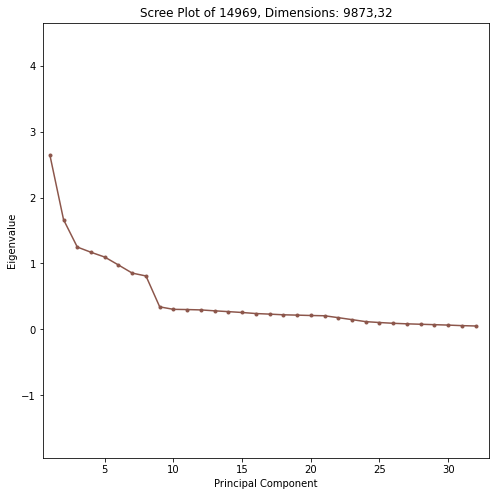

55 (5500, 40)


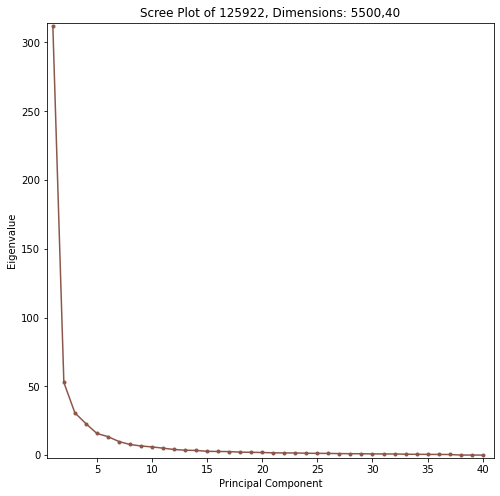

56 (67557, 42)


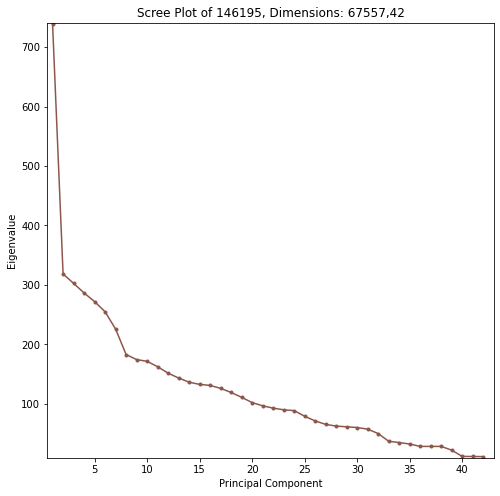

58 (1941, 27)
minka
59 (540, 18)


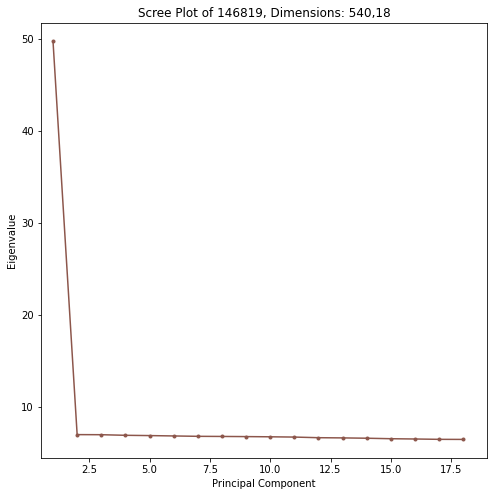

60 (4839, 5)


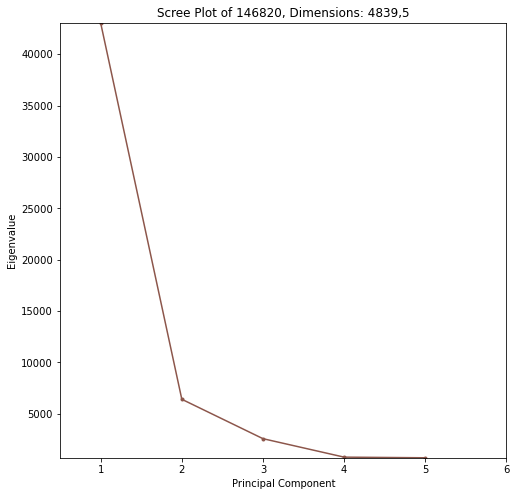

61 (1728, 6)


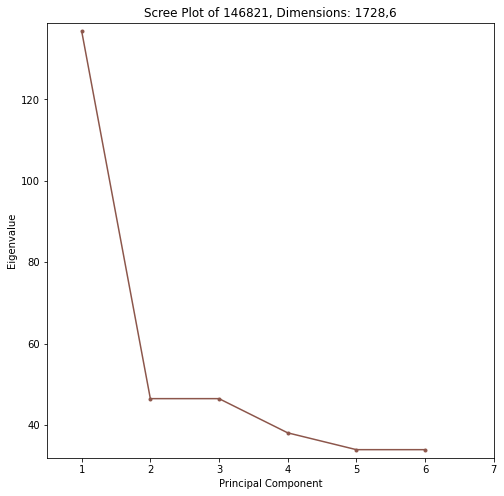

62 (2310, 16)


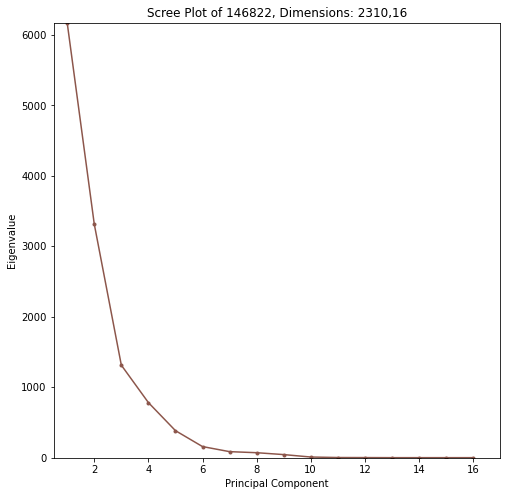

65 (44819, 6)


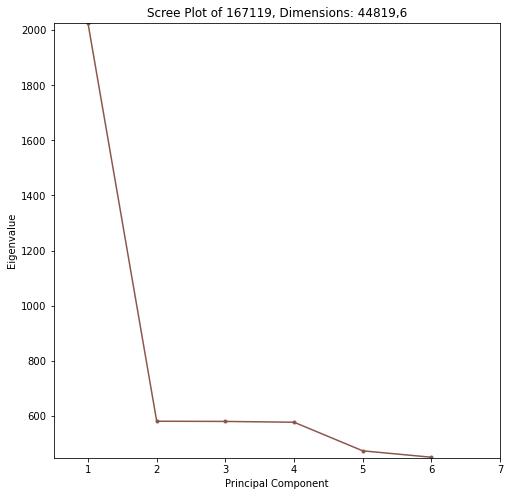

66 (96320, 21)


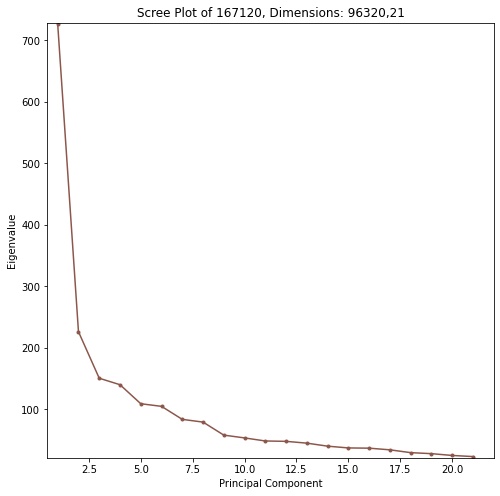

70 (3186, 180)


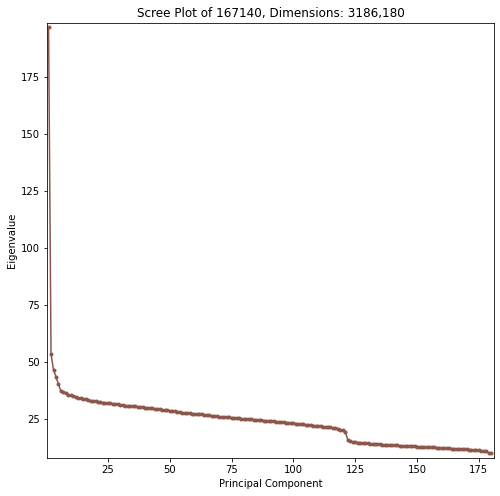

71 (5000, 20)


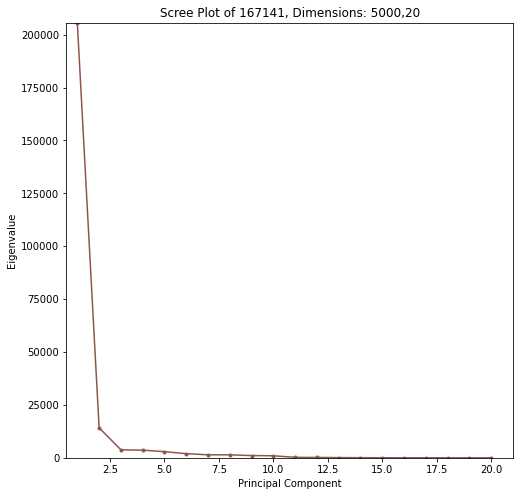

In [15]:
from matplotlib import pyplot as plt
import os
for i, task_id in enumerate(benchmark_suite.tasks):  # iterate over all tasks
    task = openml.tasks.get_task(task_id)  # download the OpenML task
    A, y = task.get_X_and_y()  # get the data
    if np.isnan(np.sum(A)) or A.shape[1] > 200:
        continue
    print(i, A.shape)
    error = False
    for j in range(1):
        try:
            minka(A)
        except:
            print("minka")
            error = True
        
        try: 
            select_dimension(A, n_components = A.shape[1] - 1)
        except:
            print("full ZG")
            error = True        
        
        try: 
            select_dimension(A)
        except:
            print("hack ZG")
            error = Tru
    if not error: 
        
        scree_basic(A,task_id)
        direc = r'D:\Hopkins\Hopkins_senior\Neurodata\ndd_prac\ndd_stuff\sprint2\small_dim_NOT_select'
        full_dir = os.path.join(direc, 'fig' + str(i) + '.png')
        plt.savefig(full_dir)
        plt.show()



In [16]:
with open('SMALL_dims_ZG_1_all.pkl', 'wb') as f:
    pickle.dump(dims_ZG_1_all, f)
    
with open('SMALL_dims_minka_all.pkl', 'wb') as f:
    pickle.dump(dims_minka_all, f)
    
with open('SMALL_dims_ZG_2_all.pkl', 'wb') as f:
    pickle.dump(dims_ZG_2_all, f)
    
with open('SMALL_dims_ZG_h_1_all.pkl', 'wb') as f:
    pickle.dump(dims_ZG_h_1_all, f)
    
with open('SMALL_dims_ZG_h_2_all.pkl', 'wb') as f:
    pickle.dump(dims_ZG_h_2_all, f)
    

with open('SMALL_surv_dims.pkl', 'wb') as f:
    pickle.dump(all_dims, f)
    

with open('SMALL_all_data.pkl', 'wb') as f:
    pickle.dump(all_data, f)

with open('SMALL_all_ys.pkl', 'wb') as f:
    pickle.dump(all_ys, f)
